<a href="https://colab.research.google.com/github/bui-anh-tuan/BaiKT-3-6/blob/main/B%C3%A0i_ki%E1%BB%83m_tra_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

# Đọc dữ liệu từ file
file_path = '/content/monthly-beer-production-in-austr.csv'
data = pd.read_csv(file_path)

# Hiển thị một vài dòng để kiểm tra dữ liệu
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 476 non-null    object 
 1   Monthly beer production in Australia  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


(     Month  Monthly beer production in Australia
 0  1956-01                                  93.2
 1  1956-02                                  96.0
 2  1956-03                                  95.2
 3  1956-04                                  77.1
 4  1956-05                                  70.9,
 None)

In [16]:
print(data.isnull().sum())


Monthly beer production in Australia    0
dtype: int64


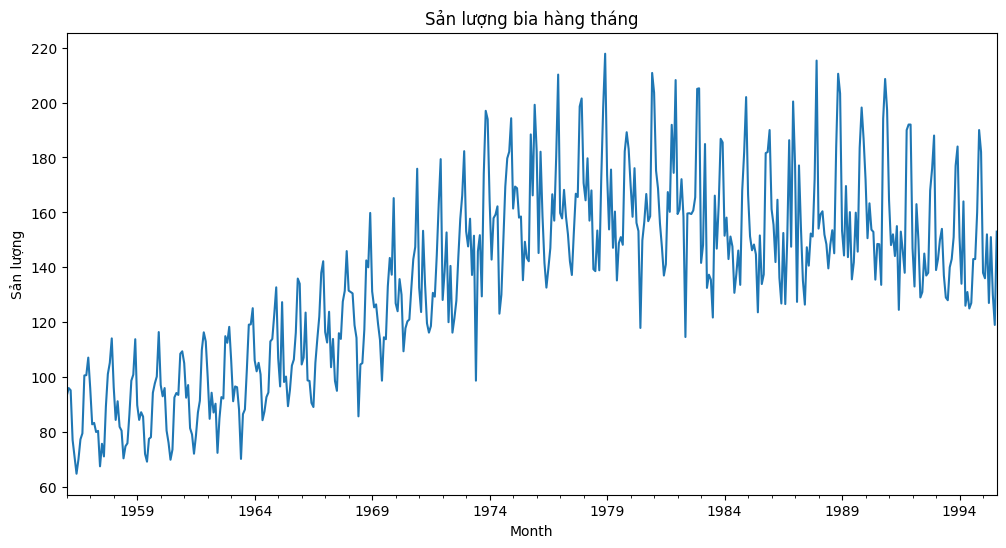

In [17]:
data['Monthly beer production in Australia'].plot(figsize=(12, 6), title="Sản lượng bia hàng tháng", ylabel="Sản lượng")
plt.show()


In [15]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Chuyển đổi cột Month sang định dạng datetime và thiết lập làm index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Kiểm tra tính dừng của chuỗi bằng kiểm định ADF (Augmented Dickey-Fuller)
adf_test = adfuller(data['Monthly beer production in Australia'])

adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
adf_result

{'ADF Statistic': np.float64(-2.282661418787577),
 'p-value': np.float64(0.17762099829132505),
 'Critical Values': {'1%': np.float64(-3.4447087976702284),
  '5%': np.float64(-2.867871300049488),
  '10%': np.float64(-2.5701423432047443)}}

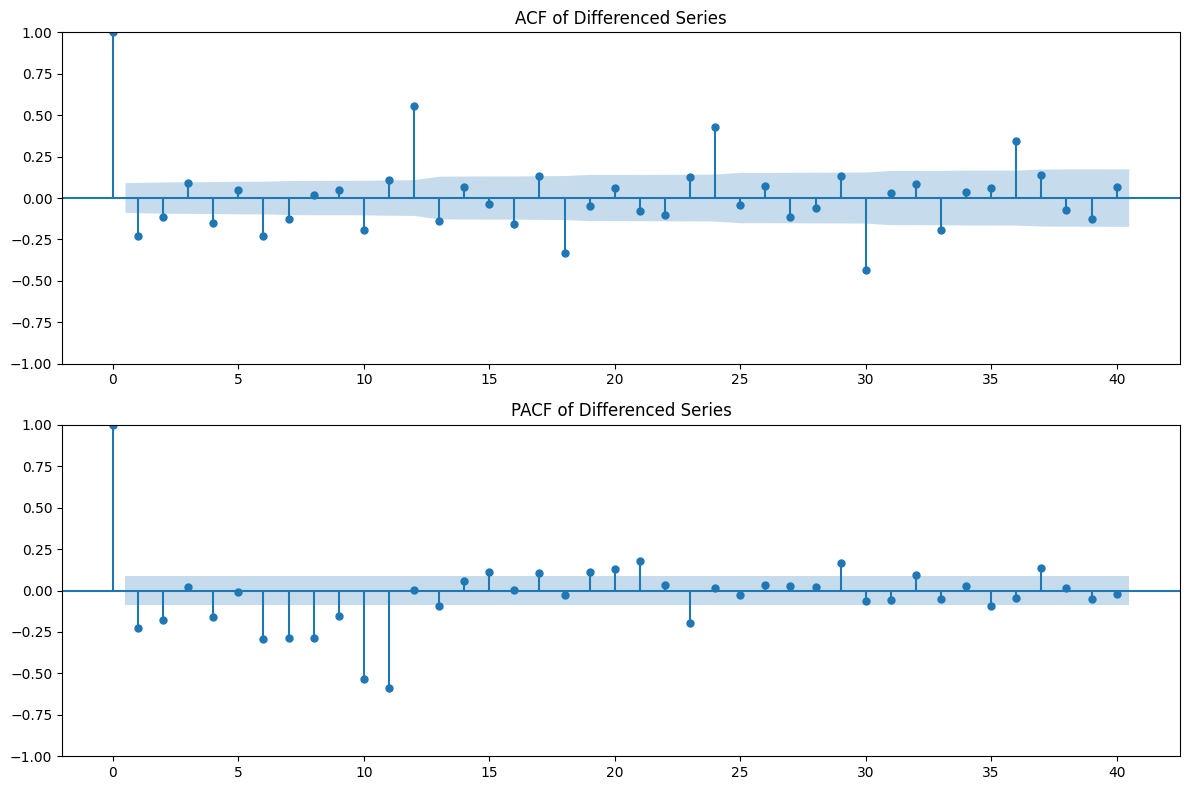

{'ADF Statistic': np.float64(-4.980663743064638),
 'p-value': np.float64(2.4234117859977578e-05),
 'Critical Values': {'1%': np.float64(-3.4447721346720885),
  '5%': np.float64(-2.8678991615065095),
  '10%': np.float64(-2.570157193174823)}}

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Lấy sai phân bậc 1
data['Diff_1'] = data['Monthly beer production in Australia'].diff().dropna()

# Kiểm tra tính dừng của chuỗi sau khi lấy sai phân
adf_test_diff = adfuller(data['Diff_1'].dropna())
adf_diff_result = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4]
}

# Hiển thị kết quả kiểm định ADF và đồ thị ACF/PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Diff_1'].dropna(), ax=axes[0], lags=40, title='ACF of Differenced Series')
plot_pacf(data['Diff_1'].dropna(), ax=axes[1], lags=40, title='PACF of Differenced Series')
plt.tight_layout()
plt.show()

adf_diff_result

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Ước lượng mô hình AR(2) trên chuỗi sai phân
model = ARIMA(data['Monthly beer production in Australia'], order=(2, 1, 0))
result = model.fit()

# Lấy thông tin hệ số ước lượng và khoảng tin cậy
params = result.params
conf_int = result.conf_int()

# Hiển thị kết quả
params, conf_int

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(ar.L1      -0.268979
 ar.L2      -0.177518
 sigma2    353.827692
 dtype: float64,
                  0           1
 ar.L1    -0.354075   -0.183884
 ar.L2    -0.265231   -0.089805
 sigma2  308.419805  399.235578)

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Ước lượng mô hình AR(2)
model = ARIMA(data['Monthly beer production in Australia'], order=(2, 1, 0))
result = model.fit()

# Lấy thông tin hệ số ước lượng và khoảng tin cậy
params = result.params
conf_int = result.conf_int()

# Hiển thị kết quả
print("Hệ số ước lượng:")
print(params)
print("\nKhoảng tin cậy:")
print(conf_int)

# Kiểm tra ý nghĩa thống kê
print("\nP-values:")
print(result.pvalues)


Hệ số ước lượng:
ar.L1      -0.268979
ar.L2      -0.177518
sigma2    353.827692
dtype: float64

Khoảng tin cậy:
                 0           1
ar.L1    -0.354075   -0.183884
ar.L2    -0.265231   -0.089805
sigma2  308.419805  399.235578

P-values:
ar.L1     5.818562e-10
ar.L2     7.288312e-05
sigma2    1.167103e-52
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


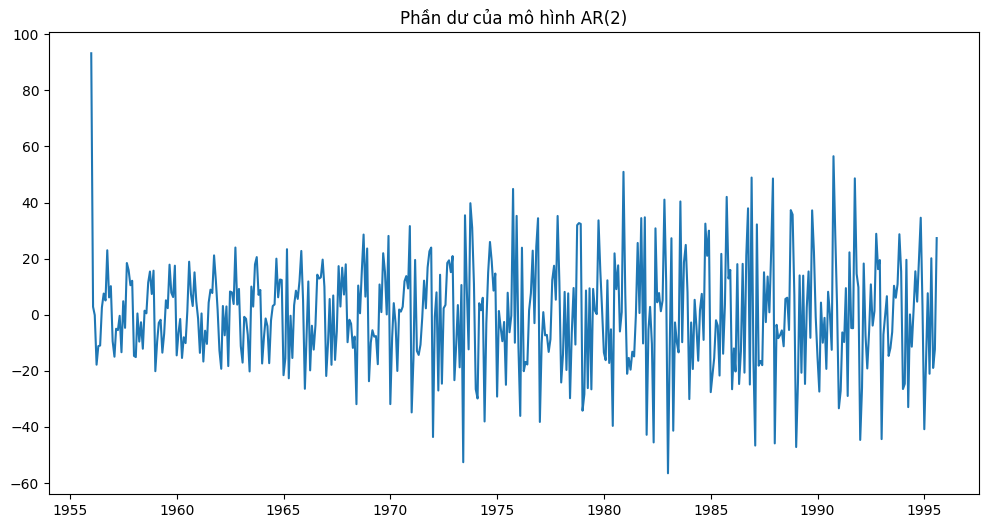

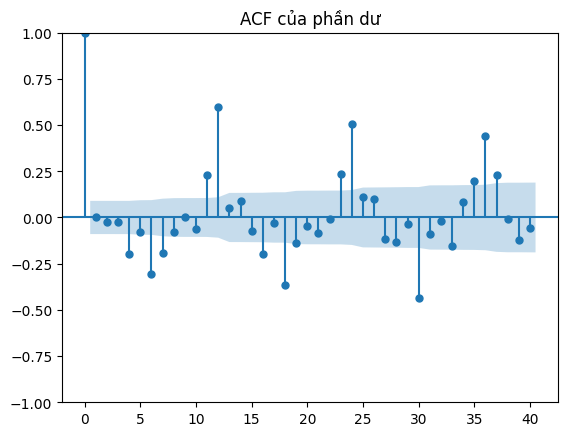

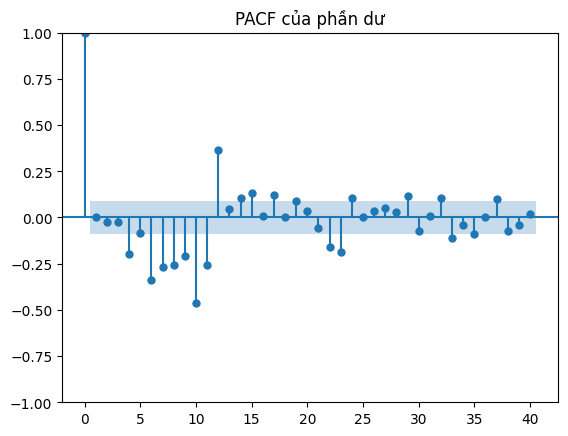

In [7]:
residuals = result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Phần dư của mô hình AR(2)")
plt.show()

# Đồ thị ACF và PACF phần dư
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=40, title="ACF của phần dư")
plot_pacf(residuals, lags=40, title="PACF của phần dư")
plt.show()
